In [2]:
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools as st
import os
from datetime import datetime
import pandas_datareader.data as web
import time
%matplotlib inline 

os.environ['ALPHAVANTAGE_API_KEY'] = '8OMTVGI7149G441M'

df0 = web.DataReader('USDCAD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df1 = web.DataReader('USDZAR', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df2 = web.DataReader('USDNOK', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df3 = web.DataReader('AUDUSD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df4 = web.DataReader('EURCAD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))

time.sleep(61)

df5 = web.DataReader('EURNOK', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df6 = web.DataReader('EURAUD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df7 = web.DataReader('EURNZD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df8 = web.DataReader('GBPAUD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df9 = web.DataReader('GBPNZD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))

time.sleep(62)

df10 = web.DataReader('GBPCAD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df11 = web.DataReader('NZDUSD', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df12 = web.DataReader('AUDJPY', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))
df13 = web.DataReader('NZDJPY', 'av-daily', start=datetime(2007,1,1), end=datetime(2020,6,30))

df = pd.DataFrame({'USDCAD':df0['close'], 'USDZAR':df1['close'], 'USDNOK':df2['close'], 'AUDUSD':df3['close'], 'EURCAD':df4['close'],
                  'EURNOK':df5['close'], 'EURAUD':df6['close'], 'EURNZD':df7['close'], 'GBPAUD':df8['close'], 'GBPNZD':df9['close'],
                  'GBPCAD':df10['close'], 'NZDUSD':df11['close'], 'AUDJPY': df12['close'], 'NZDJPY': df13['close']})

Text(0.5, 1.0, 'AUDJPY/NZDJPY')

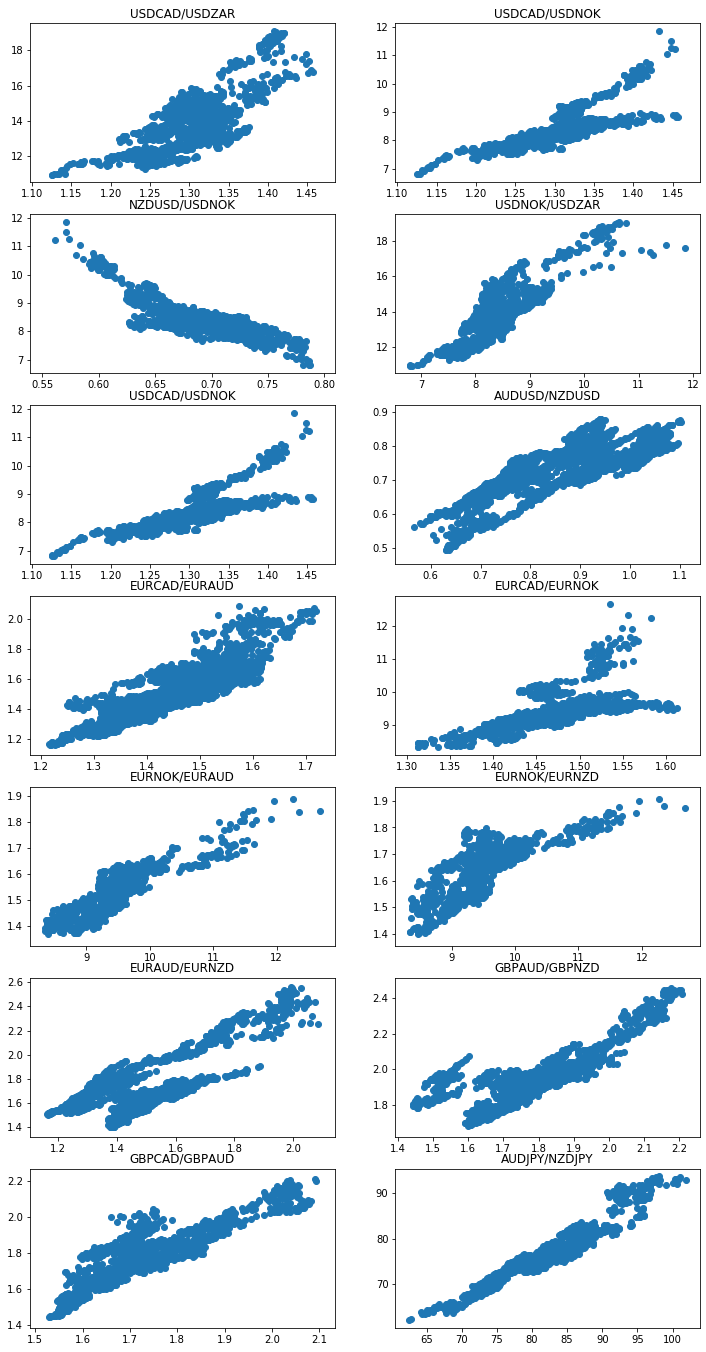

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(7,2, figsize=(12,24))
ax[0,0].scatter(df['USDCAD'],df['USDZAR'])
ax[0,1].scatter(df['USDCAD'],df['USDNOK'])
ax[1,0].scatter(df['NZDUSD'],df['USDNOK'])
ax[1,1].scatter(df['USDNOK'],df['USDZAR'])
ax[2,0].scatter(df['USDCAD'],df['USDNOK'])
ax[2,1].scatter(df['AUDUSD'],df['NZDUSD'])
ax[3,0].scatter(df['EURCAD'],df['EURAUD'])
ax[3,1].scatter(df['EURCAD'],df['EURNOK'])
ax[4,0].scatter(df['EURNOK'],df['EURAUD'])
ax[4,1].scatter(df['EURNOK'],df['EURNZD'])
ax[5,0].scatter(df['EURAUD'],df['EURNZD'])
ax[5,1].scatter(df['GBPAUD'],df['GBPNZD'])
ax[6,0].scatter(df['GBPCAD'],df['GBPAUD'])
ax[6,1].scatter(df['AUDJPY'],df['NZDJPY'])

ax[0,0].set_title('USDCAD/USDZAR')
ax[0,1].set_title('USDCAD/USDNOK')
ax[1,0].set_title('NZDUSD/USDNOK')
ax[1,1].set_title('USDNOK/USDZAR')
ax[2,0].set_title('USDCAD/USDNOK')
ax[2,1].set_title('AUDUSD/NZDUSD')
ax[3,0].set_title('EURCAD/EURAUD')
ax[3,1].set_title('EURCAD/EURNOK')
ax[4,0].set_title('EURNOK/EURAUD')
ax[4,1].set_title('EURNOK/EURNZD')
ax[5,0].set_title('EURAUD/EURNZD')
ax[5,1].set_title('GBPAUD/GBPNZD')
ax[6,0].set_title('GBPCAD/GBPAUD')
ax[6,1].set_title('AUDJPY/NZDJPY')

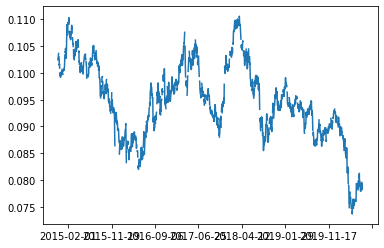

In [4]:
d1 = df['USDCAD']/df['USDZAR']
d1.plot()

In [5]:
import statsmodels.tsa.vector_ar.vecm as vm
dzar = pd.concat([df['USDCAD'],df['USDZAR']], axis=1,join='inner')
df.dropna(inplace=True)
result = vm.coint_johansen(df[['USDCAD', 'USDZAR']].values, det_order=0, k_ar_diff=1)

In [6]:
dzar.dropna(inplace=True)
print(dzar.head())
df.head()

            USDCAD   USDZAR
2014-11-24  1.1283  11.0124
2014-11-25  1.1257  10.9557
2014-11-26  1.1250  10.9492
2014-11-27  1.1341  10.9656
2014-11-28  1.1413  11.0130


,USDCAD,USDZAR,USDNOK,AUDUSD,EURCAD,EURNOK,EURAUD,EURNZD,GBPAUD,GBPNZD,GBPCAD,NZDUSD,AUDJPY,NZDJPY
2014-11-24,1.1283,11.0124,6.7964,0.8612,1.4036,8.4537,1.4441,1.5817,1.8242,1.9969,1.7720,0.7861,101.899,93.017
2014-11-25,1.1257,10.9557,6.7973,0.8532,1.4042,8.4789,1.4617,1.5973,1.8371,2.0113,1.7682,0.7807,100.600,92.048
2014-11-26,1.1250,10.9492,6.8277,0.8538,1.4071,8.5391,1.4644,1.5882,1.8501,2.0057,1.7769,0.7869,100.405,92.541
2014-11-27,1.1341,10.9656,6.9232,0.8522,1.4129,8.6266,1.4618,1.5857,1.8446,2.0009,1.7829,0.7854,100.439,92.575
2014-12-01,1.1319,10.9932,6.9382,0.8492,1.4118,8.6522,1.4684,1.5847,1.8554,1.9989,1.7810,0.7868,100.449,93.049


In [7]:
type(df.index[1])

str

In [8]:
result.evec

array([[ 28.53615973, -11.39736196],
       [ -0.47281717,   0.92467097]])

In [9]:
yport = pd.DataFrame(np.dot(df[['USDCAD', 'USDZAR']].values, result.evec[:,0]))

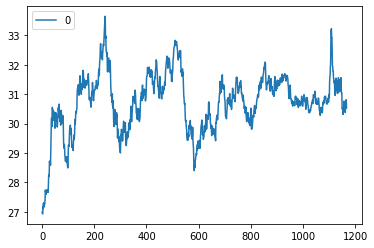

In [10]:
yport.plot()

In [11]:
import statsmodels.formula.api as sm
ylag = yport.shift()
deltaY = yport - ylag
df2 = pd.concat([ylag, deltaY], axis=1)
df2.columns = ['ylag', 'deltaY']
regress_results = sm.ols(formula="deltaY ~ ylag", data=df2).fit() ##Fit can deal with NaN in the top row
print(regress_results.params)
lam = regress_results.params['ylag']

halflife = -np.log(2)/lam
print(f"Halflife: {halflife} days")

Intercept    0.629100
ylag        -0.020373
dtype: float64
Halflife: 34.02298249093546 days


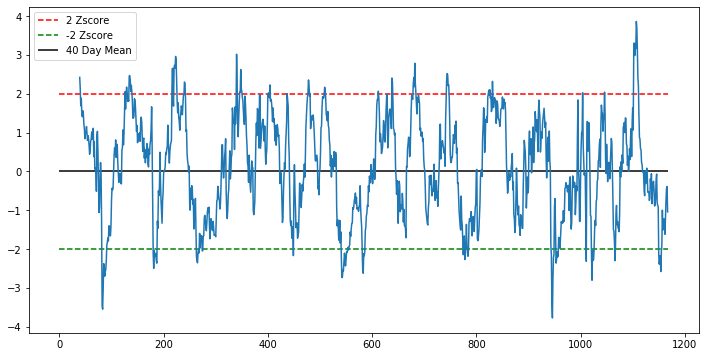

In [12]:
ma = yport.rolling(40).mean()
mstd = yport.rolling(40).std()
Zscore = (yport-ma)/mstd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
ax.hlines(2,0,len(Zscore),'r', '--', '2 Zscore')
ax.hlines(-2,0,len(Zscore),'g', '--', '-2 Zscore')
ax.hlines(0,0,len(Zscore),'k', label='40 Day Mean')
ax.plot(Zscore)
ax.legend()
plt.show()

In [13]:
yport.head()

,0
0,26.990497
1,26.943112
2,26.926210
3,27.178135
4,27.102306


In [14]:
int(halflife)

34

In [15]:
df0.tail()

,open,high,low,close,volume
2020-06-24,1.3551,1.3646,1.3525,1.3641,0
2020-06-25,1.3642,1.3670,1.3605,1.3635,0
2020-06-26,1.3635,1.3716,1.3623,1.3688,0
2020-06-29,1.3680,1.3705,1.3642,1.3654,0
2020-06-30,1.3655,1.3700,1.3566,1.3574,0
